In [1522]:

# Import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from datetime import datetime as dt 
pd.set_option('max_colwidth', 400)

### Extract the Data

In [1605]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
imports_df = pd.read_excel(r'cleaned_resources/Imports.xlsx', engine='openpyxl')
imports_df = imports_df.drop(labels=[35,36,37,38], axis =0)
imports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1369.200299,1452.492905,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664
1,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5923.729993,5828.442382,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527
2,Belgium_Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,528.372082,481.510209,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715
4,Croatia,0.000000,0.000000,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,393.825469,390.873959,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527


In [1524]:
# imports_df = pd.melt(imports_df, id_vars = "Country", var_name= "Year", value_name="Import_Volume")
# imports_df

In [1525]:
# Export the DataFrame as a CSV file. 
imports_df.to_csv(("Resources/imports.csv"))

In [1606]:
# Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
exports_df = pd.read_excel(r'cleaned_resources/Exports_calendar_year.xlsx', engine='openpyxl')
exports_df = exports_df.drop(labels=[55,56], axis =0)
exports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Angola,84.3500,70.501000,80.250000,38.878000,8.3020,40.559000,51.831000,50.494000,53.929000,...,4.370000,7.575000,8.375000,5.520000,9.375000,10.515000,10.945000,9.055000,9.323397,23.357178
1,Bolivia (Plurinational State of),156.4420,73.523000,96.204000,47.319000,84.3210,93.958000,123.445000,110.955000,97.039000,...,78.268006,74.308883,62.675780,54.850533,61.751267,30.280158,22.456342,26.119992,22.459634,20.341955
2,Brazil,16935.7876,21182.761402,18790.719202,17837.747999,17273.1476,14468.432201,15250.609002,16801.260005,18144.388334,...,33166.641590,33806.009328,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709
3,Burundi,584.7730,687.851000,645.858000,417.609000,507.8030,528.202000,224.076000,528.764000,373.841000,...,307.118958,217.845799,392.006917,194.715883,252.178000,230.188550,204.270831,168.876264,201.725236,292.887291
4,Cameroon,2611.2590,1752.179000,1645.851000,704.530000,545.8890,407.269000,563.549000,1368.030000,745.718000,...,793.845667,490.283067,621.812800,271.949217,375.033867,390.142717,281.128967,245.017117,287.415250,249.902400


In [1531]:
# exports_df=pd.melt(exports_df, id_vars = "Country", var_name= "Year", value_name="Export_Volume")
# exports_df

In [1532]:
# Export the DataFrame as a CSV file. 
exports_df.to_csv(("Resources/exports.csv"))

In [1607]:
# Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
prices_paid_to_growers_df = pd.read_excel(r'cleaned_resources/Prices_paid_to_growers.xlsx', engine='openpyxl')
prices_paid_to_growers_df = prices_paid_to_growers_df.drop(labels=[62,63,64,65,66,67], axis =0)
prices_paid_to_growers_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,180.5484,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836
1,Kenya,60.5721,50.6778,28.9495,47.6419,152.6058,140.1651,110.0360,183.9967,179.8972,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,Tanzania,40.8183,49.5039,49.1581,38.2833,62.1553,86.7599,62.5345,118.5236,90.7025,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941
4,Burundi,58.0195,55.0206,59.2340,58.2708,60.6823,56.6854,51.9721,52.7855,52.2187,...,85.6928,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [1534]:
# prices_paid_to_growers_df=pd.melt(prices_paid_to_growers_df, id_vars = "Country", var_name= "Year", value_name="Growers_Price")
# prices_paid_to_growers_df

In [1535]:
# Export the DataFrame as a CSV file. 
prices_paid_to_growers_df.to_csv(("Resources/prices_paid_to_growers.csv"))

In [1608]:
# Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
retail_prices_df = pd.read_excel(r'cleaned_resources/Retail_prices.xlsx', engine='openpyxl')
retail_prices_df = retail_prices_df.drop(labels=[28,29,30, 31,32,33,34], axis =0)
retail_prices_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,6.69,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070
1,Belgium,3.27,2.92,3.05,2.78,3.42,4.88,4.04,3.98,4.19,...,5.18,6.48,6.20,6.24,0.00,0.00,0.00,0.00,0.00,0.000000
2,Bulgaria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,3.62,4.16,3.44,3.59,3.75,3.45,3.79,4.64,4.58,4.208544
3,Cyprus,2.83,2.80,2.87,2.60,3.18,4.26,4.13,4.04,4.61,...,5.21,6.06,6.36,6.47,6.48,5.30,5.30,5.50,5.79,5.393971
4,Czechia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.31,5.10,...,5.01,6.58,7.13,7.00,6.61,5.75,6.14,6.58,7.27,6.697826


In [1537]:
# retail_prices_df=pd.melt(retail_prices_df, id_vars = "Country", var_name= "Year", value_name="Retail_Price")
# retail_prices_df

In [1538]:
# Export the DataFrame as a CSV file. 
retail_prices_df.to_csv(("Resources/retail_prices.csv"))

### Creating summary statistics and plots

### Imports plots

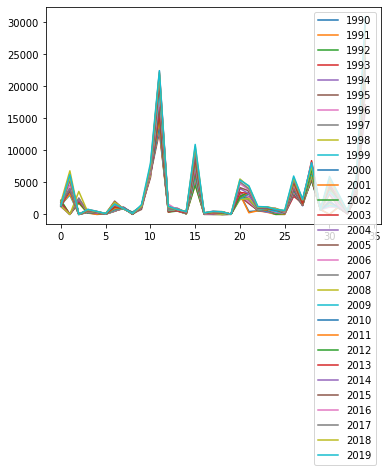

In [1615]:
imports_df.plot()

In [1601]:
imports_df["Mean imports 1990-2019"] = imports_df.mean(axis = 1)
imports_df["Total imports 1990-2019"] = imports_df.sum(axis = 1)
imports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Mean imports 1990-2019,Total imports 1990-2019
0,Austria,1879.717004,2058.271005,2206.416005,1836.489002,1417.214004,1231.436001,1210.466006,1294.203405,1293.354106,...,1558.609366,1554.926951,1525.081080,1513.390285,1494.938560,1459.911532,1429.406831,1447.513664,2977.261251,96712.970328
1,Belgium,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5668.231844,5502.143640,5211.749274,5533.514206,6052.170163,5677.379139,5742.253404,6198.896527,6717.183326,218200.116435
2,Belgium_Luxembourg,2014.954017,1746.225019,1827.851020,2063.260029,2262.473036,2401.498025,2525.823622,2544.379319,3579.677916,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1354.063338,43985.218745
3,Bulgaria,268.182998,200.220001,182.231012,397.443006,462.668007,515.418008,272.159995,294.154003,342.122004,...,559.825066,609.486668,620.708966,681.756589,779.160013,706.882517,737.243983,784.896715,894.237843,29048.306718
4,Croatia,0.000000,0.000000,168.190005,162.774001,193.450002,320.132006,321.835998,385.297004,339.051001,...,384.490360,412.849422,419.673550,437.201445,478.666658,439.074412,445.513611,466.417527,669.639508,21752.483364


In [1540]:
import matplotlib.pyplot as plt

In [1541]:
imports_df.columns

Index(['Country', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', 'Mean imports 1990-2019',
       'Total imports 1990-2019'],
      dtype='object')

In [1592]:
total_imports_df_sorted = imports_df.sort_values(by=["Total imports 1990-2019"], ascending=False)
total_imports_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Mean imports 1990-2019,Total imports 1990-2019
34,United States of America,21006.786010,19839.630013,22939.033012,19328.721012,16171.245016,17106.857014,19444.533118,20342.745825,21030.401133,...,26056.162574,27015.540160,27565.497624,27707.663702,28837.837837,29487.886464,28918.207055,30854.072649,23615.344457,732075.678154
11,Germany,13670.946005,13228.851004,13788.554006,14107.003006,13583.215008,12851.835005,13507.128909,13905.184716,13739.568415,...,21816.212008,21174.306912,22077.693664,21316.211718,22368.390781,21764.783862,22147.181429,22431.905432,17489.654132,542179.278082
15,Italy,5241.831000,4630.023000,4594.727000,5593.705001,5553.766003,5387.861005,5607.987206,5742.631909,5889.393510,...,8690.869716,8822.544900,9349.822423,9328.193272,10224.188825,10020.273316,10639.354618,10913.757224,7373.377963,228574.716863
28,Japan,5329.750004,5510.469001,5325.615998,5691.120004,6217.151005,5489.087004,5994.113004,5921.415001,6026.965002,...,7024.859940,8381.262867,7656.982990,8063.398022,8026.154485,7646.636781,7539.981823,8039.677993,6901.551931,213948.109856
10,France,6301.221035,6552.709041,6612.056041,6334.468044,6368.662042,6213.680045,6659.513448,6703.985251,6576.022652,...,6841.135557,6713.104855,7112.306134,6808.566640,6737.782710,6966.514663,7624.019021,7992.905036,6651.315460,206190.779245


TypeError: 'str' object is not callable

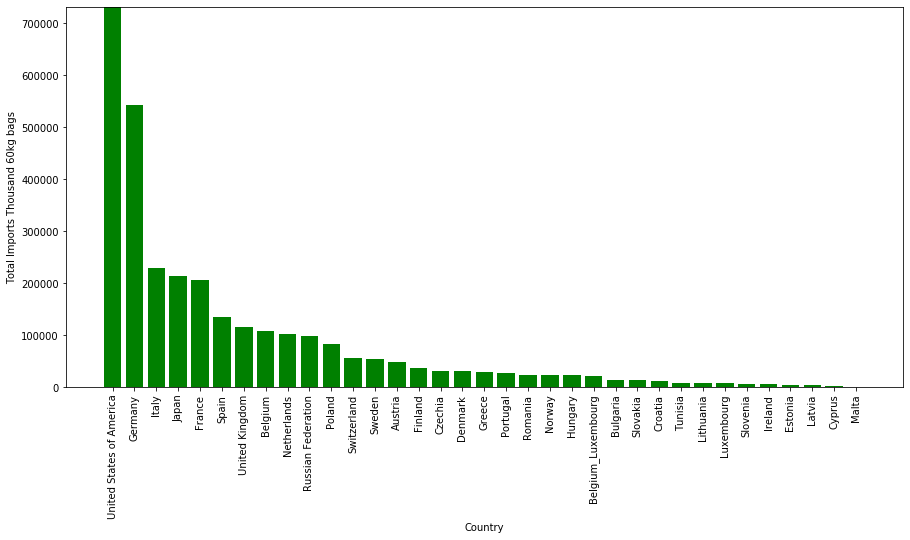

In [1597]:
x_axis = total_imports_df_sorted["Country"]
y_axis = total_imports_df_sorted["Total imports 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Total Imports Thousand 60kg bags")
plt.title("Total Imports Thousand 60kg bags 1990-2019")
plt.gcf
# plt.savefig("Images/Fig1ImportsTotal.png", dpi=100)
plt.show()

### Export Plots

In [1602]:
exports_df["Mean exports 1990-2019"] = exports_df.mean(axis = 1)
exports_df["Total exports 1990-2019"] = exports_df.sum(axis = 1)
exports_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Mean exports 1990-2019,Total exports 1990-2019
0,Angola,84.3500,70.501000,80.250000,38.878000,8.3020,40.559000,51.831000,50.494000,53.929000,...,8.375000,5.520000,9.375000,10.515000,10.945000,9.055000,9.323397,23.357178,24.090252,746.797827
1,Bolivia (Plurinational State of),156.4420,73.523000,96.204000,47.319000,84.3210,93.958000,123.445000,110.955000,97.039000,...,62.675780,54.850533,61.751267,30.280158,22.456342,26.119992,22.459634,20.341955,76.449412,2369.931769
2,Brazil,16935.7876,21182.761402,18790.719202,17837.747999,17273.1476,14468.432201,15250.609002,16801.260005,18144.388334,...,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709,26214.411280,812646.749679
3,Burundi,584.7730,687.851000,645.858000,417.609000,507.8030,528.202000,224.076000,528.764000,373.841000,...,392.006917,194.715883,252.178000,230.188550,204.270831,168.876264,201.725236,292.887291,358.942299,11127.211263
4,Cameroon,2611.2590,1752.179000,1645.851000,704.530000,545.8890,407.269000,563.549000,1368.030000,745.718000,...,621.812800,271.949217,375.033867,390.142717,281.128967,245.017117,287.415250,249.902400,777.741238,24109.978372


In [1603]:
total_exports_df_sorted = exports_df.sort_values(by=["Total exports 1990-2019"], ascending=False)
total_exports_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,Mean exports 1990-2019,Total exports 1990-2019
2,Brazil,16935.787600,21182.761402,18790.719202,17837.747999,17273.147600,14468.432201,15250.609002,16801.260005,18144.388334,...,28549.425891,31650.562945,37335.172825,37562.846747,34269.150253,30924.567849,35637.358589,40697.863709,26214.411280,812646.749679
51,Viet Nam,1145.234001,1200.952000,1937.611000,2071.837000,2720.911000,3546.405000,3779.415000,6177.834000,6466.712000,...,22919.663832,19717.764414,26097.144160,21943.502175,29721.290533,25092.158683,31385.065579,27400.161817,13846.966810,429255.971102
6,Colombia,13943.870000,12599.184998,16564.370001,13568.362004,11768.089000,9814.197000,10588.430998,10918.863002,11259.928999,...,7170.203291,9669.907367,10954.408357,12716.384670,12831.390727,12984.595747,12807.972625,13672.225599,11043.699839,342354.695013
25,Indonesia,6903.226999,6170.796000,4603.696000,5662.094001,4604.629999,3946.585001,6440.280000,5755.078000,5598.031999,...,8205.740826,9254.807331,6174.809713,8378.687596,6545.392045,8197.573974,4538.839055,6333.872889,5893.241541,182690.487774
24,India,1979.147999,1727.358999,1816.341000,2101.593000,2496.085000,2467.257001,3103.176000,2640.111001,3486.830003,...,5043.961929,5032.638529,5130.914270,5262.293887,6086.119737,6541.501049,5967.224604,6027.861152,3852.217717,119418.749241


TypeError: 'str' object is not callable

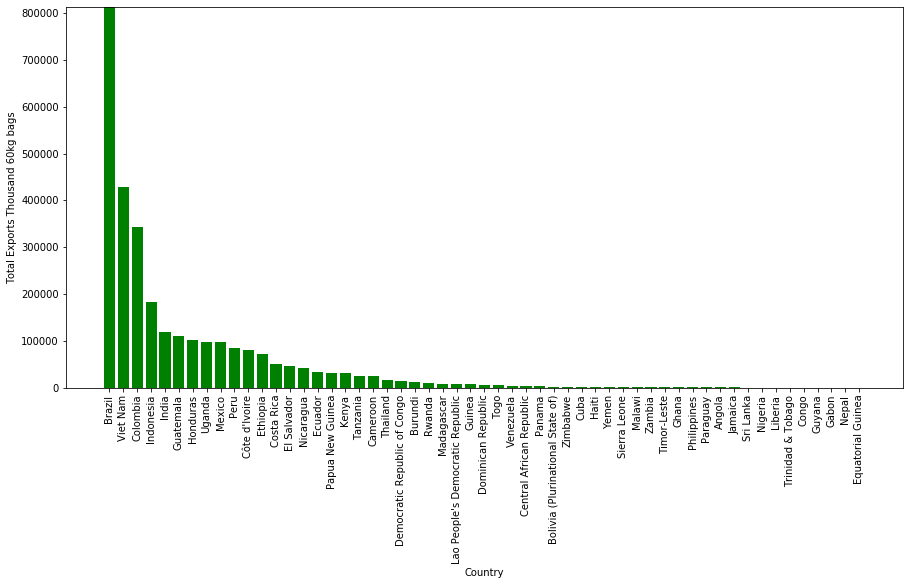

In [1604]:
x_axis = total_exports_df_sorted["Country"]
y_axis = total_exports_df_sorted["Total exports 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Total Exports Thousand 60kg bags")
plt.title("Total Exports Thousand 60kg bags 1990-2019")
plt.gcf
# plt.savefig("Images/Fig2ExportsTotal.png", dpi=100)
plt.show()

### Prices paid to growers plots

In [1609]:
prices_paid_to_growers_df["Mean price paid to grower 1990-2019"] = prices_paid_to_growers_df.mean(axis = 1)
prices_paid_to_growers_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean price paid to grower 1990-2019
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836,104.017283
1,Kenya,60.5721,50.6778,28.9495,47.6419,152.6058,140.1651,110.0360,183.9967,179.8972,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,46.062263
2,Tanzania,40.8183,49.5039,49.1581,38.2833,62.1553,86.7599,62.5345,118.5236,90.7025,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,34.673103
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941,125.185743
4,Burundi,58.0195,55.0206,59.2340,58.2708,60.6823,56.6854,51.9721,52.7855,52.2187,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,38.223777


In [1610]:
prices_paid_to_growers_df_sorted = prices_paid_to_growers_df.sort_values(by=["Mean price paid to grower 1990-2019"], ascending=False)
prices_paid_to_growers_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean price paid to grower 1990-2019
16,Jamaica,171.5513,227.4241,182.5115,255.5350,290.5986,284.2448,332.1091,286.7807,215.4499,...,302.6948,301.4442,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,196.272943
7,Cuba,171.4282,171.4282,179.9996,188.5711,203.5302,188.6010,188.5711,188.5711,188.5711,...,70.7141,70.7141,221.9638,235.7138,235.7138,235.7138,235.7138,0.0000,0.0000,145.654103
3,Bolivia (Plurinational State of),51.7802,52.4230,43.5276,27.3283,79.9150,76.9867,57.1799,100.0689,131.0938,...,0.0000,225.6445,201.9723,239.2465,234.7937,271.7944,471.6169,455.1460,858.2941,125.185743
9,Dominican Republic,66.0550,62.6429,46.5612,53.1235,112.2640,109.2636,87.6710,166.4135,95.2485,...,191.0669,147.8066,140.9774,183.5634,171.0080,177.1862,173.3619,153.6147,148.2620,108.479207
0,Colombia,69.5230,67.1251,54.5709,50.1234,85.9942,99.6231,93.5556,133.1672,102.0805,...,239.6763,166.6921,113.9086,159.7125,119.4042,123.5571,125.7612,113.5179,108.6836,104.017283


TypeError: 'str' object is not callable

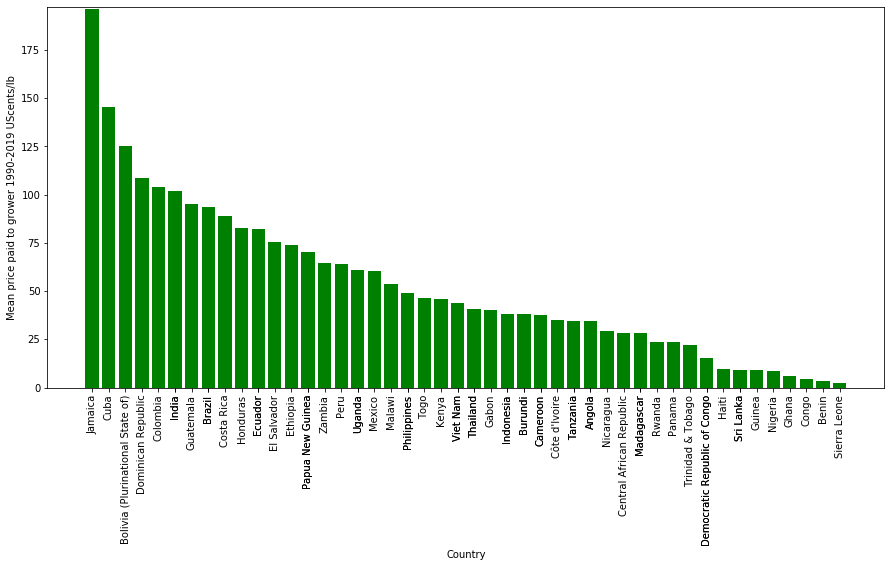

In [1611]:
x_axis = prices_paid_to_growers_df_sorted["Country"]
y_axis = prices_paid_to_growers_df_sorted["Mean price paid to grower 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Mean price paid to grower 1990-2019 UScents/lb")
plt.title("Mean price paid to grower 1990-2019 UScents/lb")
plt.gcf
# plt.savefig("Images/Fig3MeanPricePaidTogrowers.png", dpi=100)
plt.show()

### Retail_prices plots

In [1612]:
retail_prices_df["Mean retail price 1990-2019"] = retail_prices_df.mean(axis = 1)
retail_prices_df.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean retail price 1990-2019
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070,5.272536
1,Belgium,3.27,2.92,3.05,2.78,3.42,4.88,4.04,3.98,4.19,...,6.48,6.20,6.24,0.00,0.00,0.00,0.00,0.00,0.000000,3.365667
2,Bulgaria,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.16,3.44,3.59,3.75,3.45,3.79,4.64,4.58,4.208544,2.139285
3,Cyprus,2.83,2.80,2.87,2.60,3.18,4.26,4.13,4.04,4.61,...,6.06,6.36,6.47,6.48,5.30,5.30,5.50,5.79,5.393971,4.750466
4,Czechia,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.31,5.10,...,6.58,7.13,7.00,6.61,5.75,6.14,6.58,7.27,6.697826,3.898594


In [1613]:
retail_prices_df_sorted = retail_prices_df.sort_values(by=["Mean retail price 1990-2019"], ascending=False)
retail_prices_df_sorted.head()

,Country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Mean retail price 1990-2019
26,United Kingdom,10.55,10.41,10.09,8.44,11.36,13.79,13.35,14.90,15.42,...,19.02,19.20,18.92,20.56,18.91,16.29,17.01,18.40,17.553314,15.009110
14,Malta,0.00,0.00,0.00,0.00,0.00,7.80,11.95,12.20,10.03,...,14.81,14.15,14.99,14.93,12.80,13.33,14.05,15.15,14.267751,9.885925
22,Japan,10.26,11.88,12.62,14.57,14.69,17.72,15.24,14.22,13.52,...,7.35,7.57,6.05,5.68,5.60,6.21,5.95,5.80,5.711998,9.593400
10,Italy,5.31,5.62,5.86,4.59,4.68,5.70,5.92,5.45,5.53,...,8.52,8.49,8.99,8.85,7.48,7.45,7.67,8.12,7.313802,6.461793
0,Austria,4.90,4.57,4.99,4.97,4.58,5.18,5.42,4.37,3.97,...,8.32,8.38,8.62,8.63,7.44,5.64,6.22,6.63,6.166070,5.272536


TypeError: 'str' object is not callable

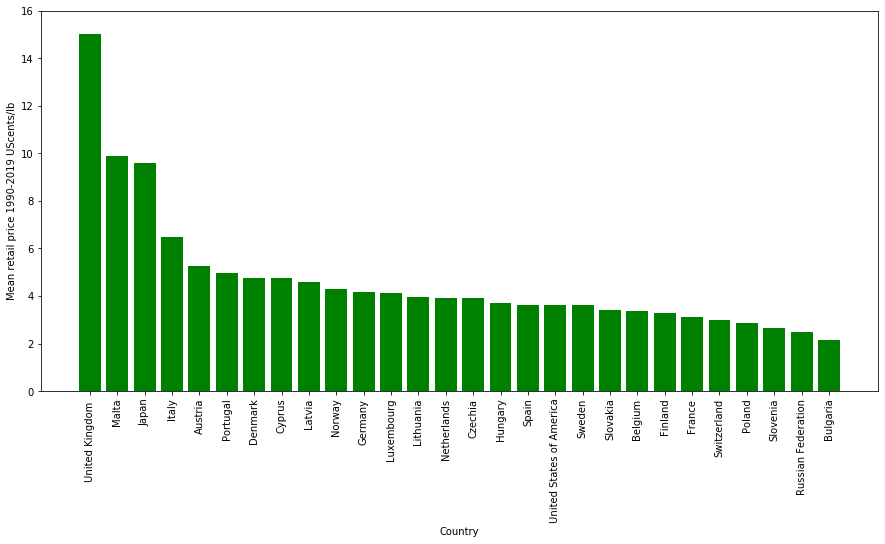

In [1614]:
x_axis = retail_prices_df_sorted["Country"]
y_axis = retail_prices_df_sorted["Mean retail price 1990-2019"]
plt.figure(figsize=(15,7))
plt.bar(x_axis, y_axis, color='green', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x_axis, rotation='vertical')
# plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+1)
plt.xlabel("Country")
plt.ylabel("Mean retail price 1990-2019 UScents/lb")
plt.title("Mean retail price 1990-2019 UScents/lb")
plt.gcf
# plt.savefig("Images/Fig4MeanRetailPrice.png", dpi=100)
plt.show()

### Joining csv files

In [ ]:
# imports_merged_df= imports_df.append(non_member_imports_df)
# imports_merged_df

In [ ]:
# imports_merged_df['Country'] = imports_merged_df['Country'].apply(lambda country: country.strip())

In [ ]:
# imports_retail_prices_merged_df= pd.merge(imports_df, retail_prices_df, on=["Country","Year"], how='left')
# imports_retail_prices_merged_df

In [ ]:
# country_df = imports_retail_prices_exports_growers_prices_merged_df.loc[imports_retail_prices_exports_growers_prices_merged_df["Country"] == "Austria", :]
# country_df

In [ ]:
# imports_retail_prices_exports_merged_df= pd.merge(imports_retail_prices_merged_df, exports_df, on=["Country", "Year"], how='outer')
# imports_retail_prices_exports_merged_df

In [ ]:
# imports_retail_prices_exports_growers_prices_merged_df= pd.merge(imports_retail_prices_exports_merged_df, prices_paid_to_growers_df, on=["Country", "Year"], how='outer')
# imports_retail_prices_exports_growers_prices_merged_df

In [ ]:
# # Export the DataFrame as a CSV file. 
# imports_retail_prices_exports_growers_prices_merged_df.to_csv(("Resources/coffee_data.csv"))

### Exploring coffee dataset

In [ ]:
imports_retail_prices_exports_growers_prices_merged_df.info()

In [ ]:
imports_retail_prices_exports_growers_prices_merged_df.describe()

In [ ]:
# country_df = imports_retail_prices_exports_growers_prices_merged_df.loc[imports_retail_prices_exports_growers_prices_merged_df["Country"] == "Austria", :]
# country_df


In [ ]:
# country_df = imports_exports_growers_retail_merged_df.loc[imports_exports_growers_retail_merged_df["Country"] == "Angola", :]
# country_df.head(50)

### Get latitude and longitude for each Country from all 5 Dataframes
### Installed geopy

In [ ]:
# # Import dependencies
# from geopy.exc import GeocoderTimedOut
# from geopy.geocoders import Nominatim

In [ ]:
# # Create a list of Countries in the imports data (will have to delete final row as a total title not a Country)
# imports_country_list = imports_df.Country.values.tolist()
# imports_country_list
# data = {'Country': (imports_country_list)}
# # print(data)
# imports_country_list_df = pd.DataFrame(data)
# imports_country_list_df = imports_country_list_df.drop([35])
# imports_country_list_df

In [ ]:
# # declare an empty list to store latitude and longitude of values from the Country column
# longitude = []
# latitude = []

# # function to find the coordinate of a given Country
# def findGeocode(Country):
       
#     # try and catch is used to overcome the exception thrown by geolocator using geocodertimedout  
#     try:
#         # Specify the user_agent as your app name
#         geolocator = Nominatim(user_agent="your_app_name")
#         return geolocator.geocode(Country)
    
#     except GeocoderTimedOut:
#         return findGeocode(Country) 
    
#     # each value from Country column will be fetched and sent to function find_geocode   
# for i in (imports_country_list_df["Country"]):
      
#     if findGeocode(i) != None:
           
#         loc = findGeocode(i)
          
#         # coordinates returned from function is stored into two separate lists
#         latitude.append(loc.latitude)
#         longitude.append(loc.longitude)
       
#     # if coordinate for a city not found, insert "NaN" indicating missing value 
#     else:
#         latitude.append(np.nan)
#         longitude.append(np.nan)    

# # Add columns to dataframe
# imports_country_list_df["Longitude"] = longitude
# imports_country_list_df["Latitude"] = latitude
  
# imports_country_list_df

In [ ]:
# # Create a list of Non_member Countries in the imports data (will have to delete last 8 rows as a total row as well as region rows)
# non_member_imports_country_list = non_member_imports_df.Country.values.tolist()
# non_member_imports_country_list
# data = {'Country': (non_member_imports_country_list)}
# # print(data)
# non_member_imports_country_list_df = pd.DataFrame(data)
# non_member_imports_country_list_df = non_member_imports_country_list_df.drop([109,110,111,112,113,114,115,116])
# non_member_imports_country_list_df

In [ ]:
# # Create a list of Countries in the exports data (will have to delete the last row as a total row)
# exports_country_list = exports_df.Country.values.tolist()
# exports_country_list
# data = {'Country': (exports_country_list)}
# # print(data)
# exports_country_list_df = pd.DataFrame(data)
# exports_country_list_df = exports_country_list_df.drop(55)
# exports_country_list_df

In [ ]:
# # Create a list of Countries in the Prices_Paid_to_Growers data 
# prices_paid_to_growers_country_list = prices_paid_to_growers_df.Country.values.tolist()
# prices_paid_to_growers_country_list
# data = {'Country': (prices_paid_to_growers_country_list)}
# # print(data)
# prices_paid_to_growers_country_list_df = pd.DataFrame(data)
# prices_paid_to_growers_country_list_df

In [ ]:
# # Create a list of Countries in the Prices_Paid_to_Growers data 
# retail_prices_country_list = retail_prices_df.Country.values.tolist()
# retail_prices_country_list
# data = {'Country': (retail_prices_country_list)}
# # print(data)
# retail_prices_country_list_df = pd.DataFrame(data)
# retail_prices_country_list_df


### Code blocks below were originally used to clean data then I was encouraged to just clean in excel.

In [ ]:
# imports_df = imports_df.drop(labels=[0,1,3,33,41,43,44], axis =0)
# imports_df


In [ ]:
# header = imports_df.iloc[0]
# imports_df = imports_df[1:]
# imports_df.columns = header
# imports_df=imports_df.rename(columns={"Calendar years":"Country"})
# # imports_df=imports_df.set_index('Country')
# imports_df

In [ ]:
# imports_df.rename(columns = {"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"}, inplace=True)
# imports_df

In [ ]:
# imports_df.info()

In [ ]:
# imports_df.describe()

In [ ]:
# # Collect the mean coffee import volume by year
# mean_coffee_import_volume = imports_df.mean()

# # Collect the years where data was collected
# years = mean_coffee_import_volume.keys()

In [ ]:
# # Plot the mean coffee import volume by year as a line chart
# imports = plt.plot(years, mean_coffee_import_volume, color="blue", label="Coffee Import Average Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[imports], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# imports_df = imports_df.T
# imports_df

In [ ]:
# imports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# imports_df.loc[:0,imports_df.columns != "Country"]

In [ ]:
# imports_df.loc[:0] = imports_df.loc[:0].replace({"1990.0":"1990", "1991.0":"1991", "1992.0":"1992", "1993.0":"1993", "1994.0":"1994", "1995.0":"1995", "1996.0":"1996", "1997.0":"1997", "1998.0":"1998", "1999.0":"1999", "2000.0":"2000", "2001.0":"2001", "2002.0":"2002", "2003.0":"2003", "2004.0":"2004", "2005.0":"2005", "2006.0":"2006", "2007.0":"2007", "2008.0":"2008", "2009.0":"2009", "2010.0":"2010", "2011.0":"2011", "2012.0":"2012", "2013.0":"2013", "2014.0":"2014", "2015.0":"2015", "2016.0":"2016", "2017.0":"2017", "2018.0":"2018", "2019.0":"2019"})
# imports_df

In [ ]:
# imports_df.loc[:0]=pd.to_datetime(imports_df.loc[:0], format = '%Y')
# imports_df


In [ ]:
# Read the 'Imports by selected importing countries' data into a Pandas DataFrame
# non_member_imports_df = pd.read_excel(r'Resources/Non_member_imports.xlsx', engine='openpyxl')

In [ ]:
# non_member_imports_df = non_member_imports_df.drop(labels=[0,1,3,32,80,97,102,118,121,127], axis =0)
# non_member_imports_df=non_member_imports_df.drop(labels=range(129,139), axis=0)
# non_member_imports_df

In [ ]:
# header = non_member_imports_df.iloc[0]
# non_member_imports_df = non_member_imports_df[1:]
# non_member_imports_df.columns = header
# non_member_imports_df=non_member_imports_df.rename(columns={"Calendar years":"Country"})
# # non_member_imports_df=non_member_imports_df.set_index('Country')
# non_member_imports_df

In [ ]:
# non_member_imports_df.info()

In [ ]:
# non_member_imports_df.describe()

In [ ]:
# # Collect the mean coffee import volume by year
# mean_coffee_non_member_import_volume = non_member_imports_df.mean()

# # Collect the years where data was collected
# years = mean_coffee_non_member_import_volume.keys()

In [ ]:
# # Plot the mean coffee import non-member volume by year as a line chart
# imports_non_member = plt.plot(years, mean_coffee_non_member_import_volume, color="green", label="Coffee Import Non_Member Average Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[imports_non_member], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# non_member_imports_df = non_member_imports_df.T
# non_member_imports_df

In [ ]:
# non_member_imports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# # Read the 'Exports of all forms of coffee by all exporting countries' data into a Pandas DataFrame
# exports_df = pd.read_excel(r'Resources/Exports_calendar_year.xlsx', engine='openpyxl')


In [ ]:
# exports_df=exports_df.drop(labels=[0,1,58,60], axis =0)
# exports_df

In [ ]:
# header = exports_df.iloc[0]
# exports_df = exports_df[1:]
# exports_df.columns = header
# exports_df=exports_df.rename(columns={"Calendar years":"Country"})
# # exports_df=exports_df.set_index('Country')
# exports_df

In [ ]:
# exports_df.info()

In [ ]:
# exports_df.describe()

In [ ]:
# # Collect the mean coffee export volume by year
# export_volume = exports_df.mean()

# # Collect the years where data was collected
# years = export_volume.keys()

In [ ]:
# # Plot the mean coffee export volume by year as a line chart
# exports = plt.plot(years, export_volume, color="green", label="Coffee Export Volume per Year" )


# # Create a legend for our chart
# plt.legend(handles=[exports], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# exports_df = exports_df.T
# exports_df

In [ ]:
# exports_df[1:].plot(legend=True)
# plt.show

In [ ]:
# # Read the 'Prices paid to growers in exporting countries' data into a Pandas DataFrame
# prices_paid_to_growers_df = pd.read_excel(r'Resources/Prices_paid_to_growers.xlsx', engine='openpyxl')


In [ ]:
# prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=[0,1,3,8,37,46], axis =0)
# prices_paid_to_growers_df=prices_paid_to_growers_df.drop(labels=range(76,103), axis=0)
# prices_paid_to_growers_df

In [ ]:
# header = prices_paid_to_growers_df.iloc[0]
# prices_paid_to_growers_df = prices_paid_to_growers_df[1:]
# prices_paid_to_growers_df.columns = header
# prices_paid_to_growers_df=prices_paid_to_growers_df.rename(columns={"Calendar years":"Country"})
# # prices_paid_to_growers_df=prices_paid_to_growers_df.set_index('Country')
# prices_paid_to_growers_df

In [ ]:
# prices_paid_to_growers_df.info()

In [ ]:
# prices_paid_to_growers_df.describe()

In [ ]:
# # Collect the prices paid to growers mean by year
# prices_paid_to_growers = prices_paid_to_growers_df.mean()

# # Collect the years where data was collected
# years = prices_paid_to_growers.keys()

In [ ]:
# # Plot the prices paid to growers mean by year as a line chart
# growers_prices = plt.plot(years, prices_paid_to_growers, color="green", label="Prices Paid to Growers Mean by Year")


# # Create a legend for our chart
# plt.legend(handles=[growers_prices], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# prices_paid_to_growers_df = prices_paid_to_growers_df.T
# prices_paid_to_growers_df

In [ ]:
# prices_paid_to_growers_df[1:].plot
# plt.show

In [ ]:
# # Read the 'Retail prices of roasted coffee in selected importing countries' data into a Pandas DataFrame
# retail_prices_df = pd.read_excel(r'Resources/Retail_prices.xlsx', engine='openpyxl')


In [ ]:
# retail_prices_df=retail_prices_df.drop(labels=[0,1,3,27], axis =0)
# retail_prices_df=retail_prices_df.drop(labels=range(34,74), axis=0)
# retail_prices_df

In [ ]:
# header = retail_prices_df.iloc[0]
# retail_prices_df = retail_prices_df[1:]
# retail_prices_df.columns = header
# retail_prices_df=retail_prices_df.rename(columns={"Calendar years":"Country"})
# # retail_prices_df=retail_prices_df.set_index('Country')
# retail_prices_df

In [ ]:
# retail_prices_df.info()

In [ ]:
# retail_prices_df.describe()

In [ ]:
# # Collect the retail prices mean by year
# retail_prices = retail_prices_df.mean()

# # Collect the years where data was collected
# years = retail_prices.keys()

In [ ]:
# # Plot the retail prices mean by year as a line chart
# retail = plt.plot(years, retail_prices, color="green", label="Retail Prices Mean by Year")


# # Create a legend for our chart
# plt.legend(handles=[retail], loc ="best")

# # Show the chart
# plt.show()

In [ ]:
# retail_prices_df = retail_prices_df.T
# retail_prices_df

In [ ]:
# retail_prices_df[1:].plot
# plt.show